# _Customer Value Analysis_

# Project Plan

## The Data

Customer Value Analysis is vital for understanding customer perceptions and improving offerings to meet their needs by observing behaviours and spending patterns. It informs decisions on product development, pricing, and marketing. 

Our project aims to analyse data from Kaggle's 'Company's Ideal Customers | Marketing Strategy' dataset by Aman Chauhan, sourced from a superstore's previous marketing campaign, uncovering trends to optimise business outcomes.
The dataset sourced from Kaggle, a renowned platform hosting diverse datasets, undergoes rigorous moderation and peer review, ensuring reliability. Being openly available implies consent for use. Consequently, we can consider this data source credible and free from ethical concerns, given its availability to all users on an open-source platform.

The data consists of four sections:

_People_

This is data related to the customer’s personal information.
* ID (Integer): Unique identifier for each customer within the dataset to act as a linkage key while preserving the customer’s privacy.
* Year_Birth (Integer): Customer’s birth year
* Education (Category): Customer’s level of education
* Marital_Status (Category): Customer's marital status
* Income (Float): Customer's yearly household income
* Kidhome (Integer): Number of small children in customer's household
* Teenhome (Integer): Number of teenagers in customer's household
* Dt_Customer (Date): Date of customer's enrolment with the business
* Recency (Integer): Number of days since customer's last purchase
* Complain (Boolean): Whether the customer filed a complaint in the last 2 years

_Products_ 

This data is concerned with the amount customers spend on each category of products in the last 2 years.
* MntWines (Integer): Amount spent on wine
* MntFruits (Integer): Amount spent on fruits
* MntMeatProducts (Integer): Amount spent on meat
* MntFishProducts (Integer): Amount spent on fish
* MntSweetProducts (Integer): Amount spent on sweets 
* MntGoldProds (Integer): Amount spent on gold

_Activities_

This data gives information about customer activities, including purchases with discounts, purchases made on different platforms, as well as website visits in the last month.
* NumDealsPurchases (Integer): Purchases made with a discount
* NumWebPurchases (Integer): Purchases made through the business’s website
* NumCatalogPurchases (Integer): Purchases made using a catalogue
* NumStorePurchases (Integer): Purchases made directly in stores
* NumWebVisitsMonth (Integer): Number of visits to business’s website in the last month

_Marketing_

These are the data which give us an overview of the success rate of each marketing campaign conducted by the company.
* AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 (Boolean): Whether a customer accepted the offers presented in each of the five consecutive campaigns conducted by the business
* Response (Boolean): Response rate in the latest campaign

_Other unknown data_
* Z_CostContact       
* Z_Revenue




## Project Aim and Objectives (5 marks)

Companies utilise data analytics to acquire a more precise insight into customer segments and trends in response to the rapid growth of available data. Our goal is to optimise customer value and prevent churn by gaining a thorough understanding of customer needs, preferences and behaviours. This project aims to improve data quality through a series of data cleansing techniques that address outliers, missing values, duplication and data format standardisation. The high quality of the data will allow for in-depth analysis of customers' personal information, behaviours, historical transactions and promotional order data, as well as clustering analysis and categorisation of customers into different groups. The clustering findings will be used as labels in the dataset to categorize customers. This approach aids a comprehensive study of customer value.

In addition, the project also aims to develop a model for predicting customer churn. By design, the model seeks to precisely anticipate churn and identify high-risk consumers. To proactively prevent churn, we tailor marketing strategies based on individual customer preferences, optimizing the relevance and effectiveness of promotional efforts. This project will assist the organisation in better understanding and managing its customer base to increase user growth and customer retention.

### Specific Objective(s)

* __Objective 1:__ Data Exploration and Quality Checking
* __Objective 2:__ Customer Segmentation and Behaviour Analysis
* __Objective 3:__ Predict Customer Churn and Identify at-risk customers
* __Objective 4:__ Personalized Marketing Algorithm

## System Design


### Architecture

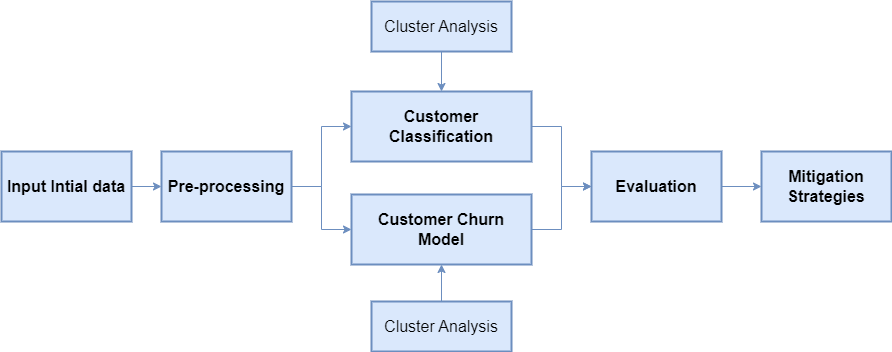

In [1]:
from IPython.display import Image
Image(filename='pipeline.png')

The overview architecture of the proposed project is structured in figure above. Data collected from Kaggle may contain errors, such as missing values, duplicates, and outliers. It then goes through different pre-processing steps such as imputation of missing values, removing outliers and data transformation to ensure the data quality.
The project then utilised the customer data to perform cluster analysis and label the customer groups. Moreover, a customer churn model is also developed. Once both models are thoroughly trained, they are then evaluated to ensure accurate detection on test data, with the evaluation based on accuracy. If the detected customer belongs to the category of potential churn, corresponding to the customer group, specific marketing strategies is provided to mitigate the risk of customer loss. If the customer falls into the area of potential churn, personalised marketing techniques are implemented to decrease the risk of customer loss.

### Processing Modules and Algorithms

* _Cleaning the data by resolving missing values, removing outliers and redundant data_:
Use imputation techniques to fill in missing values, apply statistical methods to identify and remove outliers, and utilise data profiling to eliminate redundant data.

* _Segmenting customers by using K-Means clustering algorithm_:
Group customers with similar attributes and use the elbow method to determine the optimal number of clusters(k), ensuring a meaningful segmentation of customers based on their characteristics.

* _Handling both numerical and categorical data by using Gower distance measure_:
UseGower distance to calculate similarity matrix between all records in dataset.

* _Predicting customer churn by using the K-Medoids clustering algorithm_:
Employ K-Medoids algorithm to build our clustering model as it can use a variety of similarity measures which gives us more flexibility, compared to K-Mean which only allows Euclidian distance measures.

# Program Code

Import the required packages

In [2]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import time
import multiprocessing
import gower

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from graphviz import Digraph
from IPython.display import Image, display

### _Data Exploration and Quality Checking_

Since the csv version is in disorder structure, we use `pandas` to convert the raw data into a `DataFrame`.

In [3]:
df=pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#### Process Missing Value

Firstly, We use the `info()`  method to check the dataset for missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

According to the result, we know that "Income" has 2216 values compared to 2240 non_null values for the other variables. The following 24 rows has missing data in "Income" column.

In [5]:
df.loc[df['Income'].isnull()==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Considering that educational background has an important impact on Income, we fill the null value of "income" with the mean income of different educational background group. We then use the `info()`  method to check the dataset again.

In [6]:
edu_inc=df[['Income','Education']].groupby(['Education']).mean()
for i in range(0, df.shape[0]):
    if df.Income[i]!=df.Income[i]:
        education=df.Education[i]
        income=edu_inc['Income'][education]
        df.loc[i,'Income']=income
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The result shows that there are no missing values in the data set after processing.

#### Process Outliers

At the beginning, We classify each feature into discrete, continuous, and categorical features based on their type and number of unique values, to have a better understanding.

In [7]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=2]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))

Numerical Features Count 26
Discrete features Count 9
Continuous features Count 17
Categorical features Count 3


To find variables that have outliers, we write a function called `boxplot` using `matplotlib` to plot a box plot for continuous numerical variables except "ID".

In [8]:
def boxplot(figure_name):
    fig, axes = plt.subplots(4,4, figsize=(16, 12))
    fig.suptitle(figure_name,y=0.92,fontsize=16)
    k=0
    for i in range(4):
        for j in range(4):
            ax = df.boxplot(continuous_features[k*4+j+1],ax=axes[i, j])
        k+=1

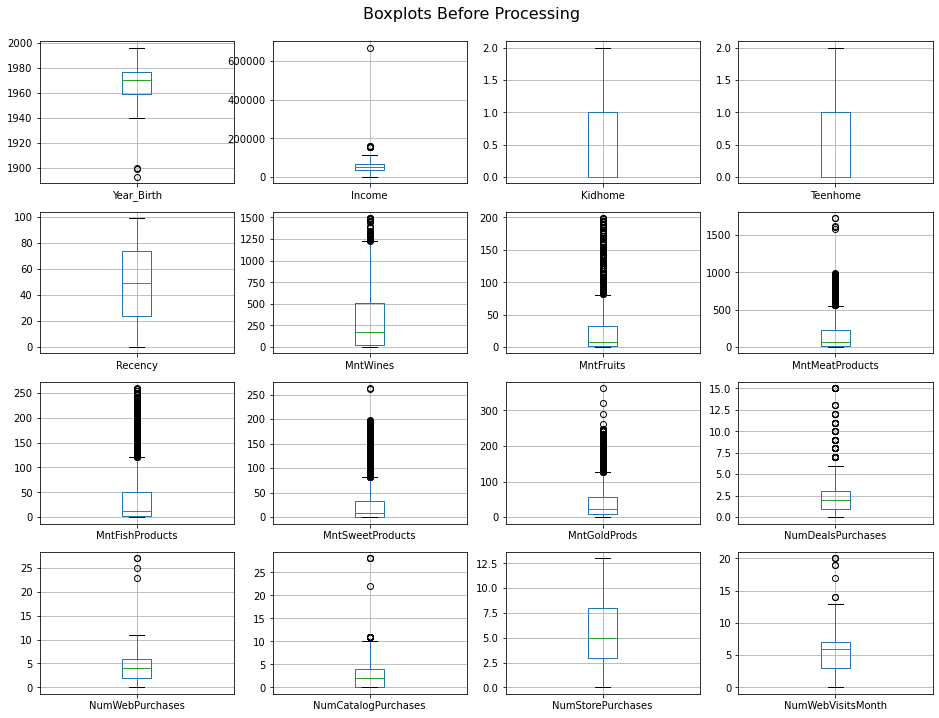

In [9]:
boxplot('Boxplots Before Processing')

As can be seen from the results in the figure above, there are a few outliers in 5 variables such as 'Year_Birth' and 'Income'.We programmed the `remove_outliers` function to delete the data that lies more or less than 1.5*IQR. 
There are a large number of outliers in 7 variables such as 'MntFruits','MntMeatProducts'. We replace them with the median through the `replace_outliers` function.

In [10]:
def remove_outliers(df,outliers_features):
    # create copy of dataframe   
    data = df.copy()    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit         
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data
remove_features = ['Year_Birth','Income', 'NumWebPurchases', 'NumCatalogPurchases','NumWebVisitsMonth']
df = remove_outliers(df,remove_features)

In [11]:
def replace_outliers(df,outliers_features):
    data = df.copy()
    data_des=data.describe()
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit        
        data[(data[feature] >= upper_limit) & (data[feature] <= lower_limit)]=data_des[feature]['50%']

    return data
replace_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases']
df = replace_outliers(df,replace_features)

Then draw the box plot again to check the quality of the processed data.

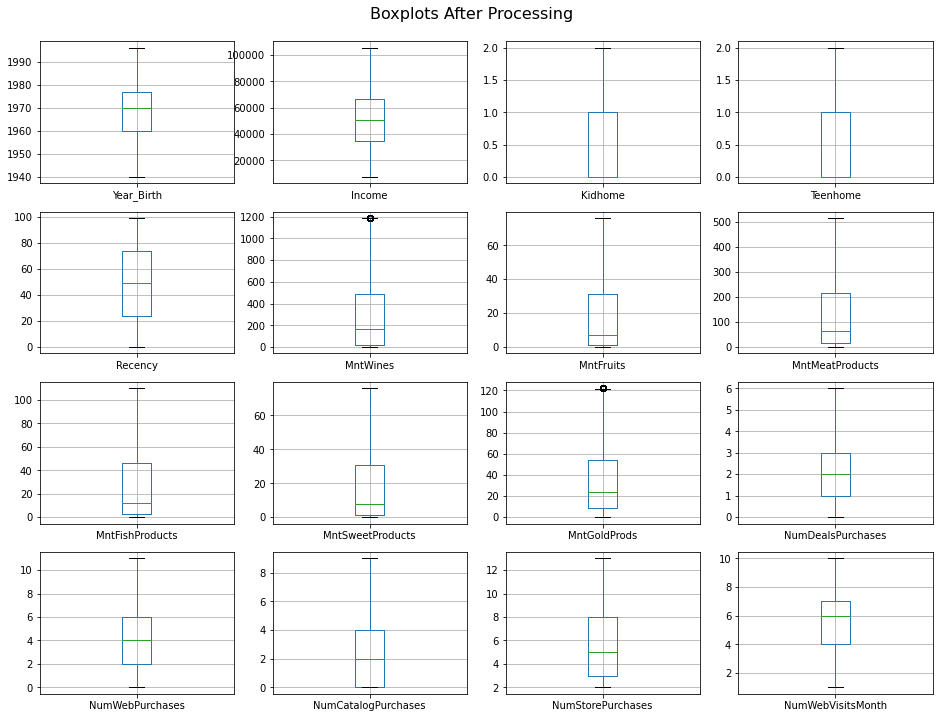

In [12]:
boxplot('Boxplots After Processing')

_The figure above shows that there are almost no outliers._

#### Transform Data

There are some data can't be used directly, so we transform some variables to make them more suitable for further analysis.

We start by using the `to_datetime` method to convert "Year_Birth" and "Dt_Customer" representing points in time into datetime format.

In [13]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

After that, we form 2 new columns by calculating the customer's age and the number of days customer enrolled with the business based on the data from 'Year_Birth' and 'Dt_Customer' column.

In [14]:
df['Age_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Days_Customer'] = ((df["Dt_Customer"].max()) - (df['Dt_Customer']))
df['Days_Customer'] = pd.to_numeric(df['Days_Customer'].dt.days, downcast='integer')

In addition, we added the values of "Kidhome" and "Teenhome" together to form a new data column "Childhome".

In [15]:
df['Childhome']=df['Kidhome']+df['Teenhome']

The values of "Z_Revenue" and "Z_CostContact" are the same, which does not bring any context to our analysis. To avoid redundancy, we chose to delete these two columns.

In [16]:
print(df['Z_CostContact'].value_counts())
print(df['Z_Revenue'].value_counts())

3    2142
Name: Z_CostContact, dtype: int64
11    2142
Name: Z_Revenue, dtype: int64


In [17]:
df=df.drop(columns=['Z_CostContact','Z_Revenue'])

The data cleaning section is completed and we use `info()` to have a final check on our data.

In [18]:
for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']:
    df[col] = df[col].astype('object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 1 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2142 non-null   int64         
 1   Year_Birth           2142 non-null   datetime64[ns]
 2   Education            2142 non-null   object        
 3   Marital_Status       2142 non-null   object        
 4   Income               2142 non-null   float64       
 5   Kidhome              2142 non-null   int64         
 6   Teenhome             2142 non-null   int64         
 7   Dt_Customer          2142 non-null   datetime64[ns]
 8   Recency              2142 non-null   int64         
 9   MntWines             2142 non-null   int64         
 10  MntFruits            2142 non-null   int64         
 11  MntMeatProducts      2142 non-null   int64         
 12  MntFishProducts      2142 non-null   int64         
 13  MntSweetProducts     2142 non-nul

The cleaned data set included 30 variables with a total of 2142 records.

### _Customer Segmentation & Behavior Analysis_

We aim to separate customers with similar characteristics and consumption habits into different groups to prepare for effective marketing.

For this reason, we wrote the `TrainCluster` function, and used the `kmeans` method to build the clustering model. We obtain 8 models and their SSE (sum of error squares) with the number of classes from 2 to 10, with aim to get the optimal k-value for accurate model.

The data used to build the model consists of customer characteristics (income and children), amount of purchase for different product category ('MntWines','MntFruits', etc.) and number of purchases made in various platform ('NumCatalogPurchases','NumStorePurchases', etc.). A total of 14 features are selected to use as independent features for clustering.

In [20]:
def TrainCluster(df_model, model_name=None, start_k=2, end_k=10):
    print('training cluster')
    K = []
    SSE = []
    silhouette_all=[]
    models = []
    for i in range(start_k, end_k):
        start = time.perf_counter ()
        kmeans_model = KMeans(n_clusters=i, random_state=42)
        kmeans_model.fit(cor)
        SSE.append(kmeans_model.inertia_)  # Save the SSE value for every k
        K.append(i)
        print('{}-prototypes SSE loss = {}'.format(i, kmeans_model.inertia_))
        models.append(kmeans_model) # Save each model built based on k value
        end = time.perf_counter()
        print('Running time: %s Seconds'%(end-start))
 
    return(K,SSE,models)

cor = df[['Income','Childhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
K, SSE, models = TrainCluster(df_model = cor)

training cluster
2-prototypes SSE loss = 245417347247.15128
Running time: 0.03765080000000065 Seconds
3-prototypes SSE loss = 123481161004.03764
Running time: 0.05518819999999991 Seconds
4-prototypes SSE loss = 73554374607.63844
Running time: 0.07703189999999971 Seconds
5-prototypes SSE loss = 47519412908.12395
Running time: 0.07989550000000012 Seconds
6-prototypes SSE loss = 35472411245.999115
Running time: 0.0993094000000001 Seconds
7-prototypes SSE loss = 27216678482.711285
Running time: 0.09017209999999931 Seconds
8-prototypes SSE loss = 21198877294.363792
Running time: 0.09503050000000002 Seconds
9-prototypes SSE loss = 16509563928.68207
Running time: 0.11828280000000024 Seconds


Due to the approximate SSE value, the elbow method is used to select the appropriate k value. We make a line graph of SSE distribution with k and observe the trend of change.

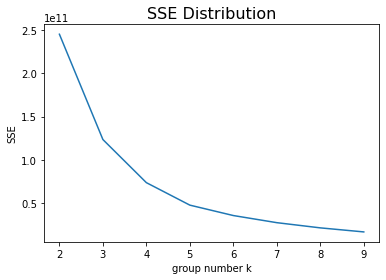

In [21]:
plt.plot(K, SSE)
plt.xlabel('group number k')
plt.ylabel('SSE')
plt.xticks(K)
plt.title('SSE Distribution',fontsize=16)
plt.show()

As can be seen from the above results, when k exceeds 5, the trend becomes flat, indicating that the return on the degree of aggregation obtained by increasing k will rapidly decrease. So it is appropriate to choose 5 as the value of k.

Using the model k=5 as the best model, the samples are labeled and the center of each group is calculated.

In [22]:
best_model = models[K.index(5)]
cor.loc[:, 'labels_'] = best_model.labels_.copy()

center = pd.DataFrame(best_model.cluster_centers_ )
center.columns = cor.columns[0:13]

center

,Income,Childhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,51538.074844,1.286585,262.762195,12.510163,80.195122,18.825203,12.833333,37.900407,3.008130,4.583333,2.010163,5.884146,5.819106
1,36696.453488,1.298450,62.490310,6.343023,34.031008,9.668605,6.195736,20.257752,2.310078,2.602713,0.703488,3.494186,6.624031
2,81769.860681,0.321981,670.250774,48.427245,385.808050,71.978328,49.755418,60.811146,1.219814,5.334365,5.414861,8.520124,2.761610
3,66330.516949,0.775424,521.629237,35.266949,237.190678,50.273305,35.324153,59.243644,2.283898,5.750000,3.993644,8.432203,4.239407
4,21604.179941,0.938053,12.480826,5.991150,16.699115,8.356932,6.247788,15.191740,1.982301,1.879056,0.412979,2.923304,6.923304


The table above shows the cluster centers, but the group numbers are randomly distributed. So we chose to sort customer groups in order of lowest to highest revenue.Here we use `sort_values` to sort and `rename` to rename the groups.

In [23]:
center.sort_values(by=['Income'],inplace=True)
center

,Income,Childhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
4,21604.179941,0.938053,12.480826,5.991150,16.699115,8.356932,6.247788,15.191740,1.982301,1.879056,0.412979,2.923304,6.923304
1,36696.453488,1.298450,62.490310,6.343023,34.031008,9.668605,6.195736,20.257752,2.310078,2.602713,0.703488,3.494186,6.624031
0,51538.074844,1.286585,262.762195,12.510163,80.195122,18.825203,12.833333,37.900407,3.008130,4.583333,2.010163,5.884146,5.819106
3,66330.516949,0.775424,521.629237,35.266949,237.190678,50.273305,35.324153,59.243644,2.283898,5.750000,3.993644,8.432203,4.239407
2,81769.860681,0.321981,670.250774,48.427245,385.808050,71.978328,49.755418,60.811146,1.219814,5.334365,5.414861,8.520124,2.761610


In [24]:
center.rename(index={4:'Group1',0:'Group2',3:'Group3',2:'Group4',1:'Group5'},inplace=True)
center

,Income,Childhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Group1,21604.179941,0.938053,12.480826,5.991150,16.699115,8.356932,6.247788,15.191740,1.982301,1.879056,0.412979,2.923304,6.923304
Group5,36696.453488,1.298450,62.490310,6.343023,34.031008,9.668605,6.195736,20.257752,2.310078,2.602713,0.703488,3.494186,6.624031
Group2,51538.074844,1.286585,262.762195,12.510163,80.195122,18.825203,12.833333,37.900407,3.008130,4.583333,2.010163,5.884146,5.819106
Group3,66330.516949,0.775424,521.629237,35.266949,237.190678,50.273305,35.324153,59.243644,2.283898,5.750000,3.993644,8.432203,4.239407
Group4,81769.860681,0.321981,670.250774,48.427245,385.808050,71.978328,49.755418,60.811146,1.219814,5.334365,5.414861,8.520124,2.761610


The table above shows the differences between the different categories, from which we can infer the preferences of each category of customers.

In [25]:
cor.loc[:,"Customer_Group"] = cor["labels_"].replace({4:'Group1',0:'Group2',3:'Group3',2:'Group4',1:'Group5'}).values

In [26]:
cor

,Income,Childhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,labels_,Customer_Group
1,46344.0,2,11,1,6,2,1,6,2,1,1,2,5,0,Group2
2,71613.0,0,426,49,127,110,21,42,1,8,2,10,4,3,Group3
3,26646.0,1,11,4,20,10,3,5,2,2,0,4,6,4,Group1
4,58293.0,1,173,43,118,46,27,15,5,5,3,6,5,0,Group2
5,62513.0,1,520,42,98,0,42,14,2,6,4,10,6,3,Group3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,1,709,43,182,42,76,122,2,9,3,4,5,3,Group3
2236,64014.0,3,406,0,30,0,0,8,6,8,2,5,7,3,Group3
2237,56981.0,0,908,48,217,32,12,24,1,2,3,13,6,0,Group2
2238,69245.0,1,428,30,214,80,30,61,2,6,5,10,3,3,Group3


To distinguish the preference differences among different customer groups more intuitively, we define a function `feature_distribution`, which uses a histogram to visualize the distribution of purchase products and platform preferences for each group.

In [27]:
def feature_distribution(col,title):
    fig = plt.figure(figsize = (20,20))
    fig.suptitle(title,y=0.92,fontsize=16)
    n_col = len(col)
    n_labels = 5
    for i in range(n_col):
        for j in range(n_labels): 
            ax = fig.add_subplot(n_col, n_labels, n_labels*i+j+1)
            g_name='Group'+str(j+1)
            cor.loc[cor.Customer_Group == g_name, col[i]].plot(kind = 'hist', bins = 50)
            ax.set_title('{},col:{}'.format(g_name, col[i]))
    plt.show()

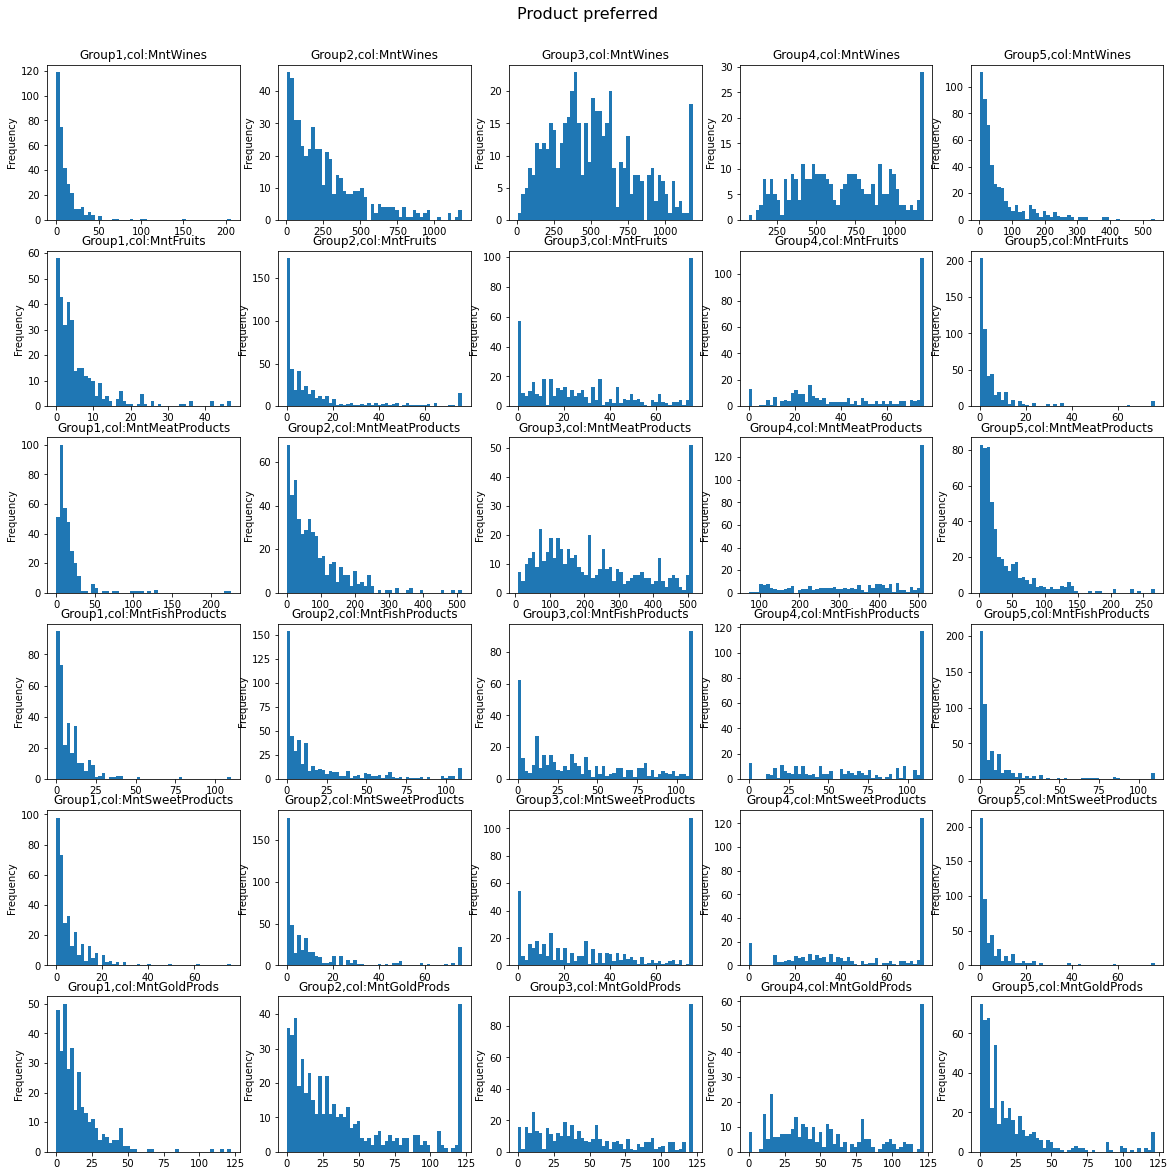

In [28]:
product_prefer = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
feature_distribution(product_prefer,'Product preferred')

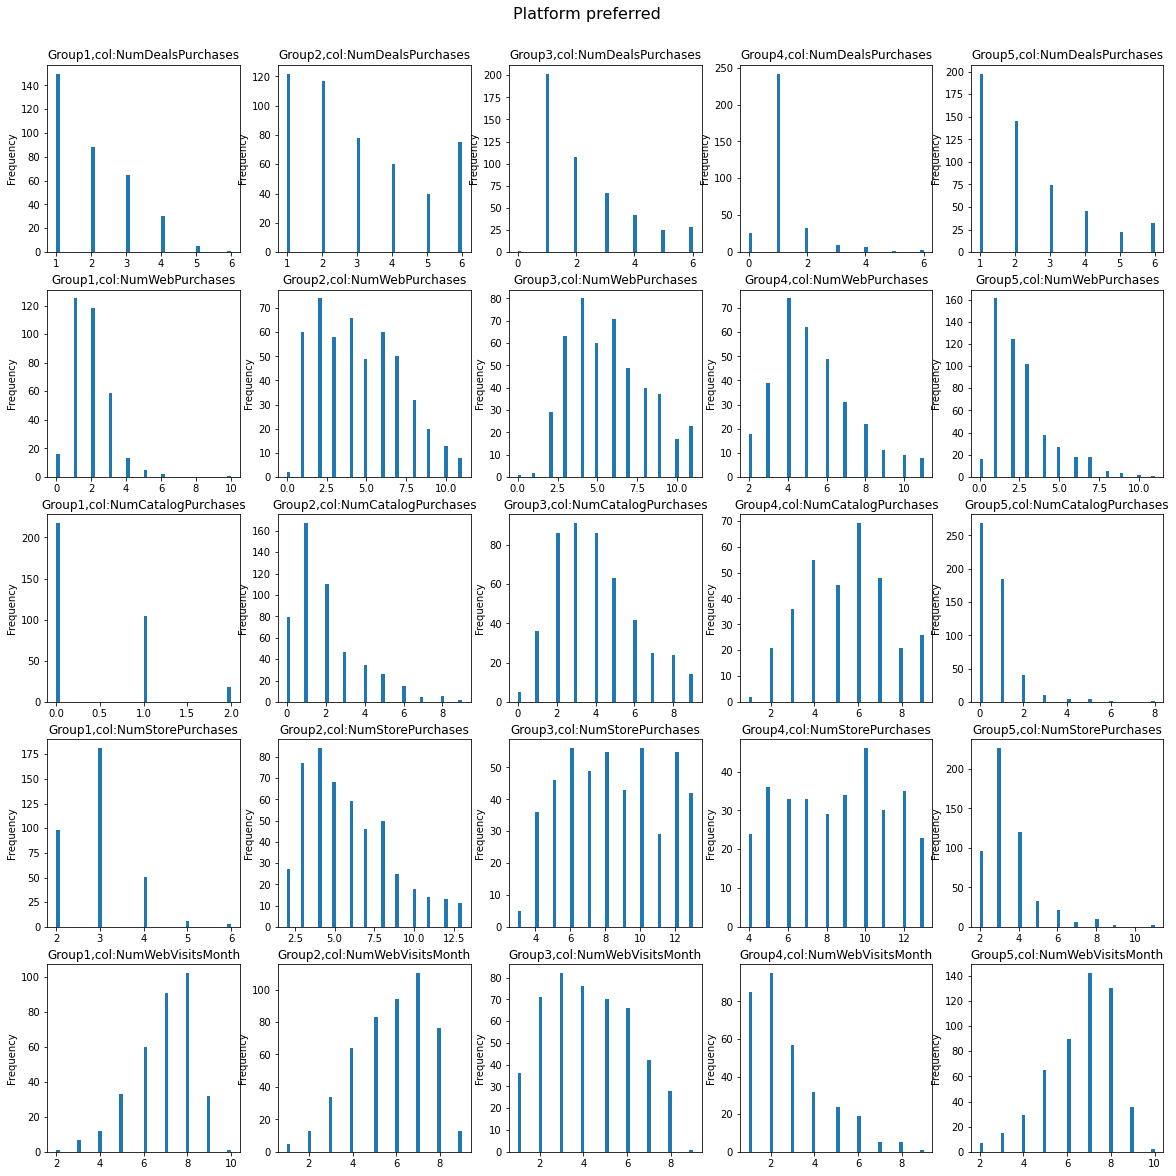

In [29]:
platform_prefer =['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
feature_distribution(platform_prefer,'Platform preferred')

Both diagrams visually demonstrate the characteristics of different groups of customers, and a detailed analysis of the images will be presented in objective 1 to avoid repetition.

### _Churn Prediction Model Development_

As our data is unlabeled for customer churn prediction, we will apply unsupervised learning method - clustering to predict whether each customer will churn or not. 

We drop the columns that are not important for analysis such as ID, Education and Marital Status. 

In [30]:
# Drop unnecessary columns
churn_df = df.copy()
churn_df.drop(columns=["ID","Education","Marital_Status","Year_Birth","Kidhome","Teenhome","Dt_Customer","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds", "Childhome"],inplace=True)

We also transform the data of response towards different marketing campaign into the number of offers the customer accepted during each campaign.

In [31]:
churn_df['NumofOfferAccepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
churn_df['NumofOfferAccepted'] = churn_df['NumofOfferAccepted'].astype('int')
churn_df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],inplace=True)

In [32]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 1 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2142 non-null   float64
 1   Recency              2142 non-null   int64  
 2   NumDealsPurchases    2142 non-null   int64  
 3   NumWebPurchases      2142 non-null   int64  
 4   NumCatalogPurchases  2142 non-null   int64  
 5   NumStorePurchases    2142 non-null   int64  
 6   NumWebVisitsMonth    2142 non-null   int64  
 7   Complain             2142 non-null   object 
 8   Age_Customer         2142 non-null   int64  
 9   Days_Customer        2142 non-null   int16  
 10  NumofOfferAccepted   2142 non-null   int32  
dtypes: float64(1), int16(1), int32(1), int64(7), object(1)
memory usage: 179.9+ KB


####  Measure distance matrix

As our data consists of mixture of features with different data types, we would use Gower distance measure that handles both numerical and categorical data.

In [33]:
# Calculate similarity matrix between all records in dataset
%time dist_matrix = gower.gower_matrix(churn_df)

Wall time: 2 s


#### K-Medoids Clustering Algorithm

We use K-Medoids algorithm to build our clustering model as it can use a variety of similiarity measures which gives us more flexibility, compared to K-Mean that only allows Euclidian distance measures.

In [34]:
# Create KMedoids model with 2 clusters
churn_model = KMedoids(n_clusters=2,
                 metric='precomputed',
                 method='alternate', init='heuristic',
                 max_iter=100).fit(dist_matrix)
churn_df['label'] = churn_model.labels_

In [35]:
churn_df.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age_Customer,Days_Customer,NumofOfferAccepted,label
1,46344.0,38,2,1,1,2,5,0,60,113,0,0
2,71613.0,26,1,8,2,10,4,0,49,312,0,1
3,26646.0,26,2,2,0,4,6,0,30,139,0,0
4,58293.0,94,5,5,3,6,5,0,33,161,0,1
5,62513.0,16,2,6,4,10,6,0,47,293,0,1


# Project Outcome

# Overview of Results

This project explored the customer marketing dataset. Overall, we considered ourselves successful in accomplishing the project objectives. By removing missing values and outliers, and standardising the data format, we managed to gain insight into the data and increase its quality for use in analysis. Second, we succeeded in creating clusters that separate customers into distinct clusters based on criteria such as demographics, behaviour, and past transaction data. Histograms are then utilised to better illustrate the preference variations between different customer groups. 

Third, a predictive model is created to forecast customer turnover and identify customers who are in danger of disengagement. To acquire a better knowledge of the churn pattern, we also study the relationship between the factors and the possibility of churn. Finally, we create and implement a personalised marketing approach that leverages insights from customer segmentation and churn prediction model to better optimise marketing and operational efforts to retain high-risk churn customers. If a customer is recognised as being at high risk of churn, we determine which cluster the customer belongs to make personalised advertising that the customer is likely to be interested in.

## Objective 1: Data Exploration and Quality Checking
### Explanation of Results

Data exploration and quality checking are essential steps in the process of data analysis and preparation, ensuring that the data is reliable and accurate. These steps assist us in grasping the distinctive characteristics of the data, identifying any potential issues, and ensuring that the data is fit for further analysis. Since the results of data exploration and quality checking provide valuable insights and information about the dataset which sets the stage for subsequent data analysis. We decide to investigate the dataset's quality and clean it by eliminating outliers, missing values, and incorrect values.

Null values are detected in 'Income'. However, the data could not be removed considering that 'Income' are required to perform analysis. Since levels of education are associated with 'Income', the null value of 'Income' is replaced by the mean income of different educational background group. Moreover, outliers have been found in some variables such as 'Year_Birth', 'MntFruits', 'MntMeatProducts' and 'Income'. replace_outliers function is utilized to replace the data that lies more or less than 1.5*IQR with median. Also, the data shows that the values of 'Z_Revenue' and 'Z_CostContact' are not needed therefore both columns are deleted to avoid redundancy.

The combination of data exploration and quality checking provides a dataset that is well-understood, cleaned, and prepared. Since significant shortcomings have been resolved and important characteristics have been highlighted, this dataset is now more suitable for in-depth analysis, modeling, or any other task. As a result, we are able to uncover insights, resolve data issues, and create a clean and reliable dataset for further analysis. The outcomes lay the groundwork for making informed decisions and obtaining meaningful conclusions from the data.

### Visualisation

The code below shows the information of the cleaned dataset.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 1 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2142 non-null   int64         
 1   Year_Birth           2142 non-null   datetime64[ns]
 2   Education            2142 non-null   object        
 3   Marital_Status       2142 non-null   object        
 4   Income               2142 non-null   float64       
 5   Kidhome              2142 non-null   int64         
 6   Teenhome             2142 non-null   int64         
 7   Dt_Customer          2142 non-null   datetime64[ns]
 8   Recency              2142 non-null   int64         
 9   MntWines             2142 non-null   int64         
 10  MntFruits            2142 non-null   int64         
 11  MntMeatProducts      2142 non-null   int64         
 12  MntFishProducts      2142 non-null   int64         
 13  MntSweetProducts     2142 non-nul

We draw a box plot to see the cleaned columns after dealing with outliers

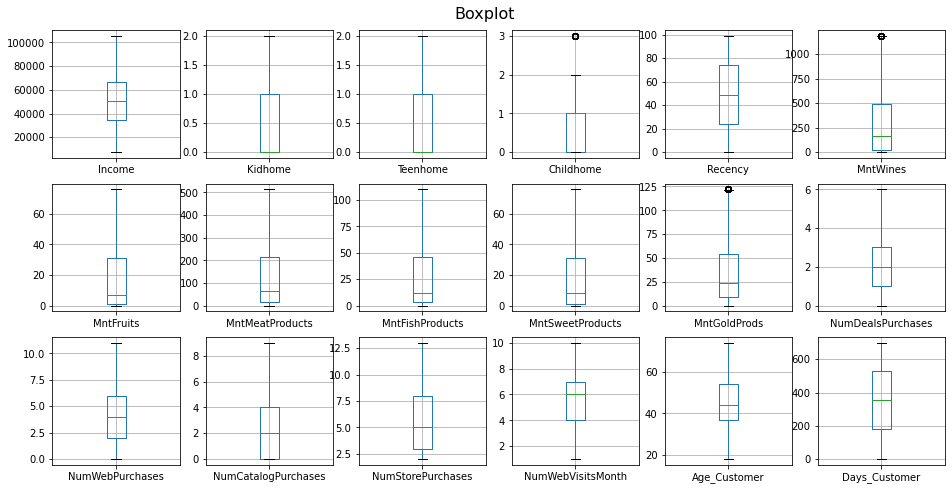

In [37]:
cols = ['Income', 'Kidhome', 'Teenhome', 'Childhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Age_Customer', 'Days_Customer']
fig, axes = plt.subplots(3,6, figsize=(16, 8))
fig.suptitle('Boxplot',y=0.92,fontsize=16)
k=0
for i in range(3):
    for j in range(6):
        ax = df.boxplot(cols[k],ax=axes[i, j])
        k+=1

## Objective 2: Customer Segmentation & Behavior Analysis

### Explanation of Results

Looking at Figure 2.1 in the horizontal dimension, Group 1 to 5 shows a gradual rightwards deviation in the purchase volume of each product, which indicates an increase. This is highly possible to be determined by income. The peaks in Figure 2.2 are more obvious, which we guess indicates the preference of each group in terms of purchasing platform. So combining the two plots, we summarised the characteristics of each group of members:

* <b><i>Group 1: Low-Income members. </i></b>They buy a large proportion of daily food. Prefer to browse the website, looking for a good price, but the conversion rate is not high, which may be because of their economic situation.

* <b><i>Group 2: Medium-Low income multi-child members. </i></b>  In contrast, meat accounts for a high proportion of their consumption, which may be due to the number of children. And because the income is not high, they are more attentive to deals.

* <b><i>Group 3: Medium income with a large number of children. </i></b> Group that had most purchases with deals, reaching an average of 3 times. It has similar characteristics to Group 2, but it spends significantly more on alcohol than Group 2.

* <b><i>Group 4: Medium-High income members. </i></b> They are the group that likes shopping online the most, perhaps because they are busy at work. In contrast, prefer to buy gold products with a high sense of value.

* <b><i>Group 5: High-income member group. </i></b> They like to use a catalogue to find the target products quickly and conveniently. At the same time, they tend to have a high quality of life, therefore they shop more offline and have a high interest in wine products.


### Visualisation
The following figures give a vivid representation of the distribution of products and platforms purchased separately, in which the preference of each group is clearly illustrated.

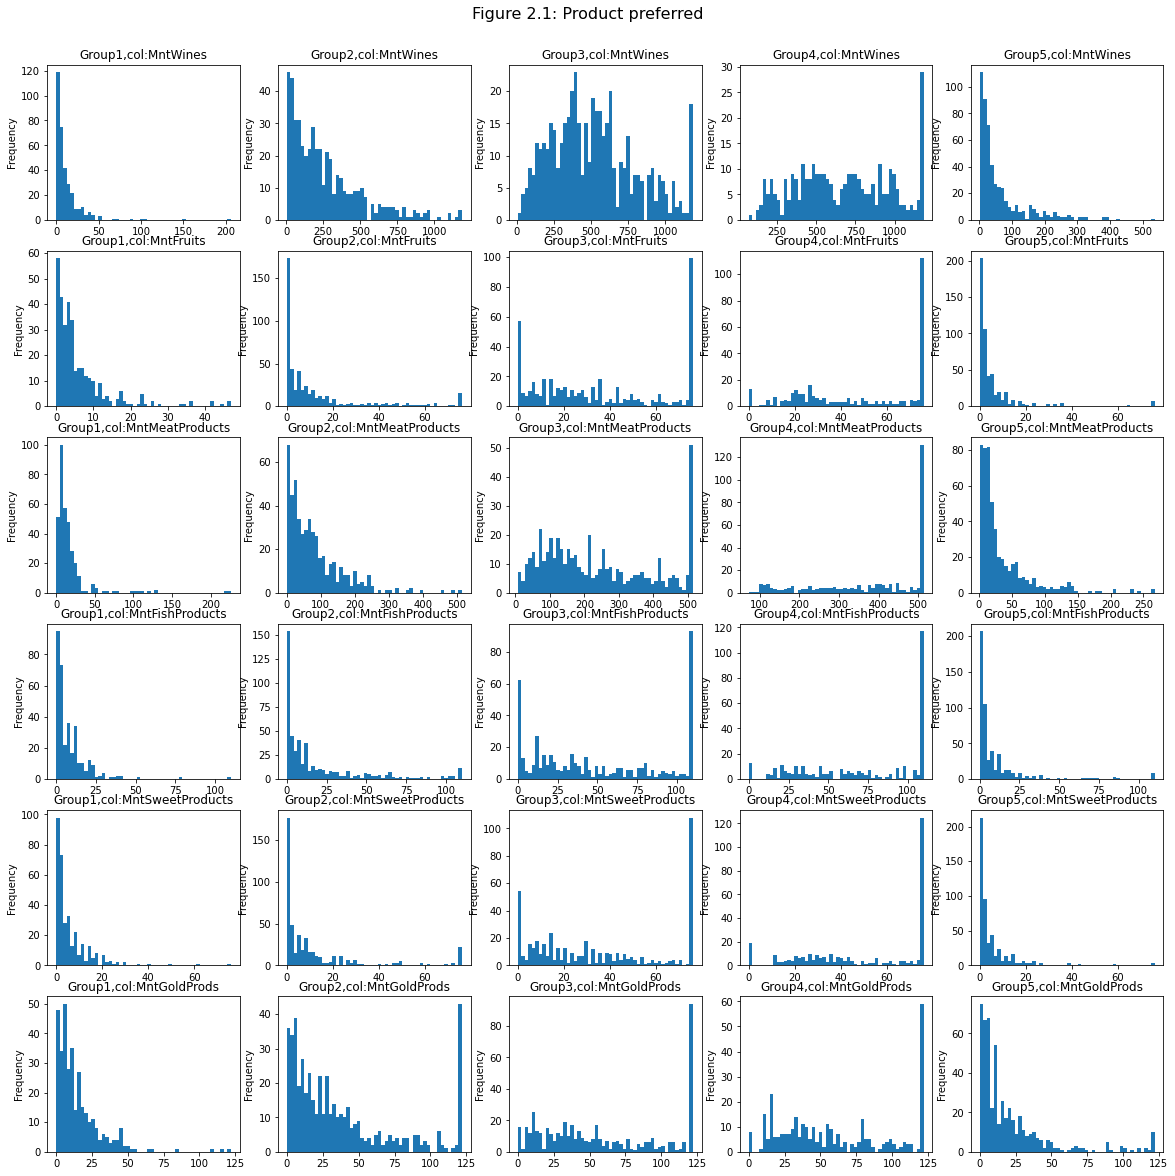

In [38]:
feature_distribution(product_prefer,'Figure 2.1: Product preferred')

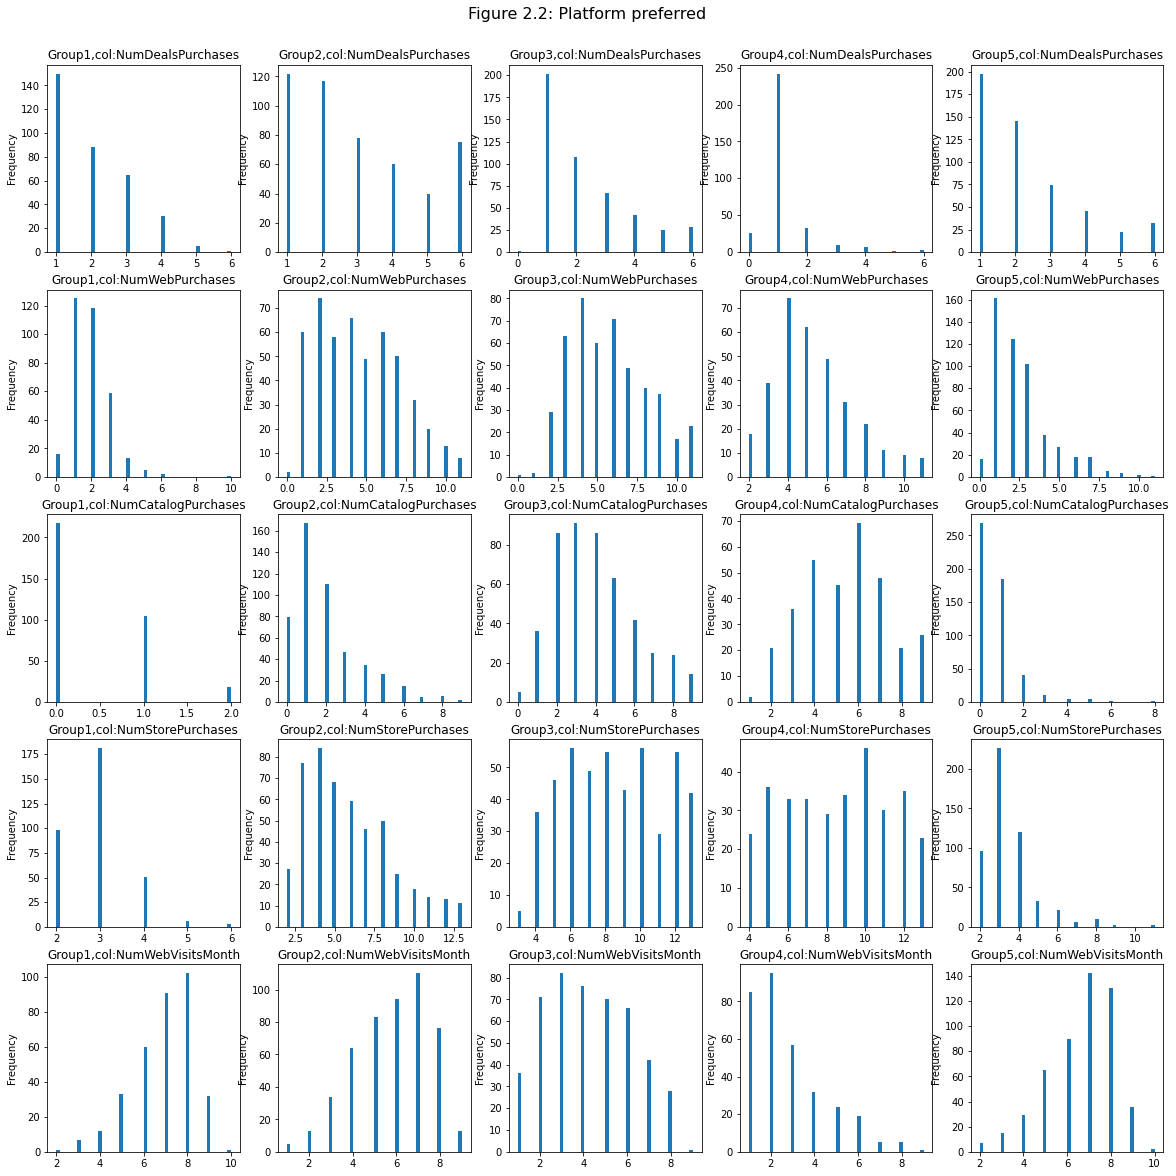

In [39]:
feature_distribution(platform_prefer,'Figure 2.2: Platform preferred')

## Objective 3: Predict Customer Churn and Identify at-risk customers
### Explanation of Results

The application of K-medoids clustering yielded two distinct clusters among our customer base, which are labelled '1' for engaged customers who have less churn probability and '0' for customers who have potential churn risk.
The code relates to the K-medoids model we built to predict customer churn. There are 2 figures, where figure 3.1 represents the correlation matrix against the churn label and figure 3.2 shows the plot of variables that are highly correlated to the churn label.

As observed from the correlation heatmap, 'Income', 'NumWebPurchases', 'NumCatalogPurchases' and 'NumStorePurchases' are the variables which have a strong correlation against the churn label. The positive correlations between income (0.79), and multiple purchase types (ranging from 0.66 to 0.77) indicate a lower likelihood of churn within this segment.

The scatter plots in Figure 3.2 suggests that the model clustered customers with higher income, and more frequent purchases across various channel catalogue, store) as customers that are less likely to churn. 
Even though the correlation is relatively high, we can still see that the data does not form clear cluster groups. It is probable that the number of purchases made across different platforms can influence the customer churn risk but does not bring high predictive power.


### Visualisation

The following heatmap visualises customer churn patterns by showing the churn rates based on customer behaviours. 
It shows positively correlated variables in red and negatively correlated variables in blue, where the darker colours mean a higher correlation. 



Text(0.5, 0.99, 'Figure 3.1: Customer Churn Correlation Heatmap')

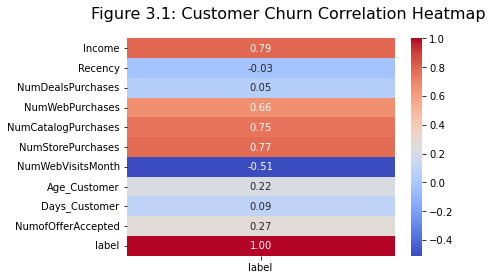

In [40]:
# Correlation Matrix Heatmap
fig, ax = plt.subplots()
corr = churn_df.corr().iloc[:,-1:]
heatmap = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f')
fig.suptitle('Figure 3.1: Customer Churn Correlation Heatmap', y=0.99, fontsize=16)

The following figure consists of subplots that plot the variable that has a correlation of at least 60% against the churn label. This helps us to distinguish the clusters.

Text(0.5, 1.15, 'Figure 3.2')

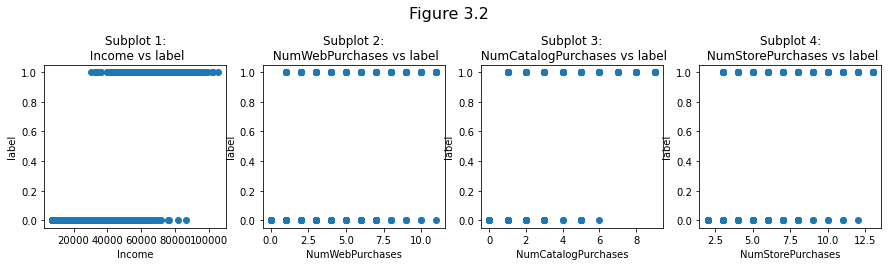

In [41]:
# Scatter plot against high correlation variables
x_cols = ['Income', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
y_col = 'label'

fig, axs = plt.subplots(1, 4, figsize=(15, 3))
i = 0
for x_col in x_cols:
    axs[i].scatter(churn_df[x_col], churn_df[y_col])
    axs[i].set_xlabel(x_col)
    axs[i].set_ylabel(y_col)
    axs[i].set_title("Subplot {}:\n {} vs {}".format(i+1, x_col, y_col))
    i += 1
fig.suptitle("Figure 3.2",y=1.15,fontsize=16)

## Objective 4: Personalized Marketing Algorithm
### Explanation of Results

Figure 4 illustrates the customer clustering and churn strategy. Nodes represent distinct customer groups, while edges denote relationships and clusters. Each node provides details about specific group characteristics. If a customer is predicted as a high-risk churn customer, further analysis of the customer's purchasing habits is conducted to determine their group. Subsequently, personalised strategies are provided to prevent customer churn.

##### General Strategy:

   1. Send supermarket discount information and online shopping coupons by SMS, email, and push notifications.
   2. Establish a customer feedback platform using channels like WhatsApp for rapid online customer service responses and efficient complaint resolution.

##### Segment-Specific Churn Prevention:

* Group 5 (High-Income, Offline, Wine Lover):
    1. Provide high-end in-store shopping experiences, e.g. VIP shopping days with exclusive discounts and double points.
    2. Create a "Wine Lover" section in the online catalogue, featuring new products and tasting events.
* Group 4 (Medium-High Income Online Shoppers):
    1. Promote Gold Products via email, offering additional points or discounts for designed Gold Products.
    2. Provide premium online shopping experience with exclusive product launches, personalised shopping recommendations, and limited free shipping delivery services.
* Group 2 & Group 3 (Medium-Low Income, Many Children, Deal Seekers):
    1. Send weekly emails with the latest discounts on meat products and distribute "Loyalty Coupons" to encourage purchases.
    2. Offer family packages and discounts to meet their demand for meat and budget-friendly shopping
* Group 1 (Low-Income, Many Children, Low Conversion Rate):
    1. Send daily emails with discounted items and a limited-time flash sale section on the online platform to promote quick purchases.
    2. Introduce affordable daily “Too Good to Go” surprise bags, offering special pricing for unsold or close-to-expiry items to satisfy daily food purchase demand.

### Visualisation

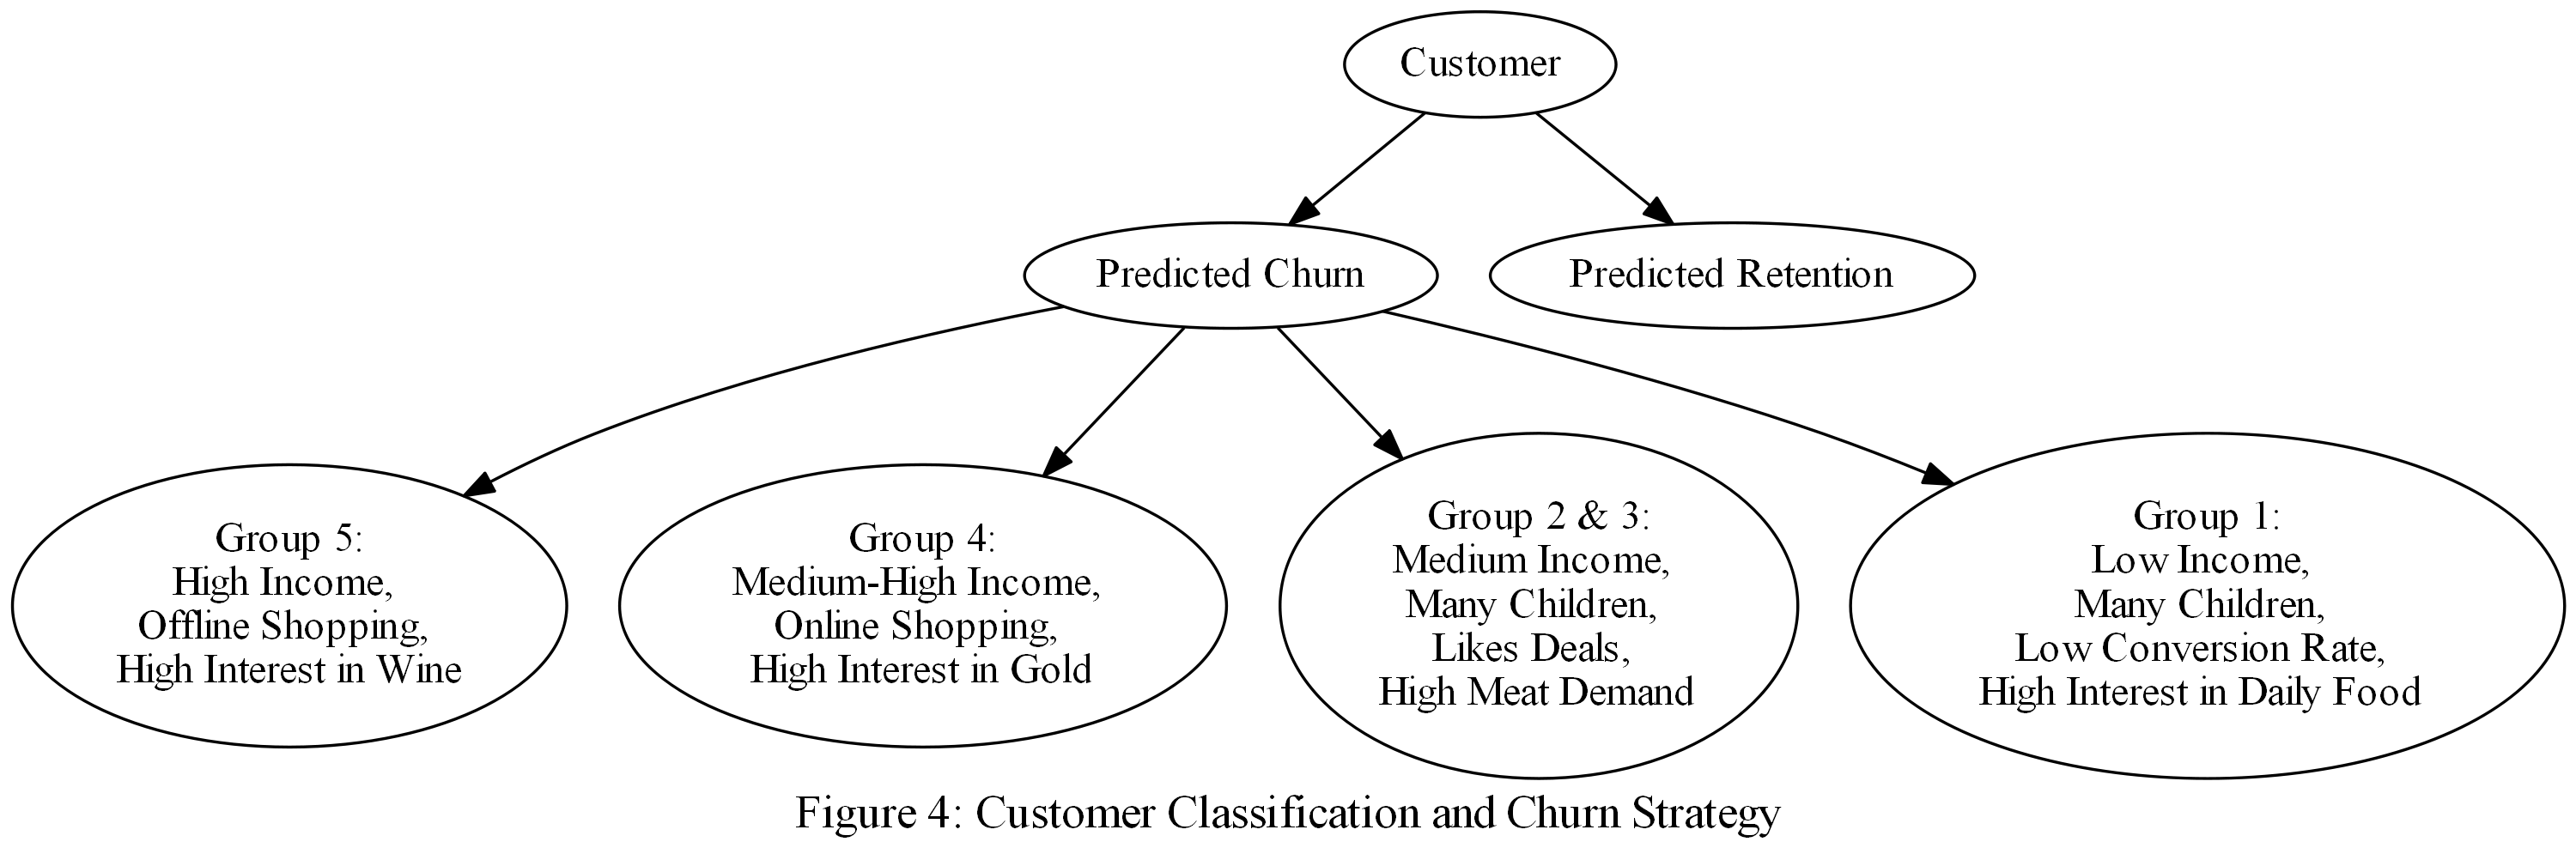

In [42]:
def generate_and_display_graph():
    # Create a Digraph object for Customer Classification and Churn Strategy
    dot = Digraph(comment='Customer Classification and Churn Strategy')
    dot.attr(dpi=str(300), size='10,8')

    # Add nodes and edges
    dot.node('A', 'Customer')
    dot.node('B', 'Predicted Churn')
    dot.node('C', 'Predicted Retention')
    dot.node('D', 'Group 5:\nHigh Income, \nOffline Shopping, \nHigh Interest in Wine')
    dot.node('E', 'Group 4:\nMedium-High Income, \nOnline Shopping, \nHigh Interest in Gold')
    dot.node('F', 'Group 2 & 3:\nMedium Income, \nMany Children, \nLikes Deals, \nHigh Meat Demand')
    dot.node('G', 'Group 1:\nLow Income, \nMany Children, \nLow Conversion Rate, \nHigh Interest in Daily Food ')

    dot.edges(['AB', 'AC', 'BD', 'BE','BF','BG'])
    
    # Set graph attributes
    dot.attr(label='Figure 4: Customer Classification and Churn Strategy', fontsize='16', color="midnightblue")
    dot.attr('node', shape='box', style='rounded', color='darkslategray', fontsize='16')
    dot.attr('edge', color='gray')

    # Render the graph and display it
    display(Image(data=dot.render(format='png', engine='dot')))

generate_and_display_graph()

# Conclusion

### Achievements
Through rigorous data cleansing processes, we has successfully reached many milestones in optimising customer value and retention. Improvements in data quality have paved the way for significant data analysis, allowing us to gain deep insights into customer categories, behaviours, and preferences. As expected, the primary predictors of customer segmentation were primarily around income levels, the number of children, and purchasing volumes across multiple categories. This understanding has greatly benefited in the creation of specific strategies aimed at increasing customer experience and satisfaction. 

The development of a predictive churn model, despite the unexpected discovery regarding variables like 'Days_Customers' and 'Recency,' has also enabled proactive measures to retain high-risk consumers. Surprisingly, variables such as 'Days_Customers' and 'Recency' showed minimal correlation with churn predictions, while income emerged as a consistent indicator of reduced churn risk. This unexpected insight reshaped our understanding, highlighting the pivotal role of socioeconomic factors in shaping effective retention strategies. These achievements pave the way for more refined and impactful approaches to nurturing customer relationships and ensuring long-term retention.

### Limitations

Despite significant progress, certain limitations persist within this project. The accuracy and efficiency of the churn prediction model might require further refinement to increase its precision. Additionally, while clustering analysis has provided valuable insights, continual evolution and fine-tuning of segmentation techniques could yield even more nuanced customer categorization.

### Future Work

In future work, we hope to improve the accuracy of churn prediction and customer segmentation  by supplementing the dataset with relevant characteristics, refining modeling techniques through advanced algorithms and feature engineering.  and implementing dynamic strategies that react to changing consumer behaviours. Efforts to overcome limitations in feature suitability involve gathering additional customer-centric data and reassessing feature selection methodologies.

Moreover, integration of decision tree models an intriguing approach for directly predicting churn and segmenting clients, allowing for the development of personalised retention tactics based on individual preferences. These collective advancements will drive a more precise and adaptable approach to managing customer churn while optimizing targeted retention initiatives.